In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv('weather_daily_agg.csv', parse_dates=['DATE']).dropna()
traffic = pd.read_csv('traffic_daily_agg.csv', parse_dates=['DATE'])

In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 450
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   AVERAGE_FELT_TEMPERATURE  449 non-null    object        
 1   AVERAGE_ROAD_TEMPERATURE  449 non-null    object        
 2   MINIMUM_FELT_TEMPERATURE  449 non-null    object        
 3   DATE                      449 non-null    datetime64[ns]
 4   MINIMUM_PRECIPITATION     449 non-null    float64       
 5   MAXIMUM_HUMIDITY          449 non-null    float64       
 6   MAXIMUM_FELT_TEMPERATURE  449 non-null    float64       
 7   MAXIMUM_PRECIPITATION     449 non-null    float64       
 8   MAXIMUM_TEMPERATURE       449 non-null    float64       
 9   AVERAGE_HUMIDITY          449 non-null    float64       
 10  AVERAGE_WIND              449 non-null    float64       
 11  AVERAGE_DIRECTIONOFWIND   449 non-null    float64       
 12  MINIMUM_TEMPERATURE   

In [4]:
weather.columns = [c.lower() for c in weather.columns]

In [5]:
weather.iloc[:,:3] = weather.iloc[:,:3].astype('float64')

In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 450
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   average_felt_temperature  449 non-null    float64       
 1   average_road_temperature  449 non-null    float64       
 2   minimum_felt_temperature  449 non-null    float64       
 3   date                      449 non-null    datetime64[ns]
 4   minimum_precipitation     449 non-null    float64       
 5   maximum_humidity          449 non-null    float64       
 6   maximum_felt_temperature  449 non-null    float64       
 7   maximum_precipitation     449 non-null    float64       
 8   maximum_temperature       449 non-null    float64       
 9   average_humidity          449 non-null    float64       
 10  average_wind              449 non-null    float64       
 11  average_directionofwind   449 non-null    float64       
 12  minimum_temperature   

In [7]:
traffic.columns = [c.lower() for c in traffic.columns]
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   max_number_of_vehicles  485 non-null    int64         
 1   minimum_speed           485 non-null    int64         
 2   min_number_of_vehicles  485 non-null    int64         
 3   average_speed           485 non-null    float64       
 4   avg_number_of_vehicles  485 non-null    float64       
 5   maximum_speed           485 non-null    int64         
 6   date                    485 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 26.6 KB


In [8]:
traffic.head()

max_number_of_vehicles  minimum_speed  min_number_of_vehicles  \
0                     539              1                      11   
1                    1134              1                      11   
2                    1009              1                      11   
3                    1051              1                      11   
4                     540              1                      11   

   average_speed  avg_number_of_vehicles  maximum_speed       date  
0          58.03                   67.08            219 2020-01-01  
1          54.22                  108.61            217 2020-01-02  
2          55.14                  103.68            222 2020-01-03  
3          56.74                   95.52            223 2020-01-04  
4          57.57                   69.30            210 2020-01-05

In [9]:
df = pd.merge(traffic, weather, how='inner', on='date')
df

max_number_of_vehicles  minimum_speed  min_number_of_vehicles  \
0                       539              1                      11   
1                      1134              1                      11   
2                      1009              1                      11   
3                      1051              1                      11   
4                       540              1                      11   
..                      ...            ...                     ...   
440                     782              1                      11   
441                     398              1                      11   
442                    1147              1                      11   
443                    1140              1                      11   
444                    1096              1                      11   

     average_speed  avg_number_of_vehicles  maximum_speed       date  \
0            58.03                   67.08            219 2020-01-01   
1            54.22                  108.61            217 2020-01-02   
2            55.14                  103.68            222 2020-01-03   
3            56.74                   95.52            223 2020-01-04   
4            57.57                   69.30            210 2020-01-05   
..             ...                     ...            ...        ...   
440          59.95                   73.82            212 2021-04-24   
441          61.14                   49.34            246 2021-04-25   
442          56.56                   97.48            213 2021-04-26   
443          55.82                   97.51            224 2021-04-27   
444          55.14                   93.17            247 2021-04-28   

     average_felt_temperature  average_road_temperature  \
0                        4.59                      5.45   
1                        3.67                      5.04   
2                        5.22                      6.17   
3                        6.32                      7.18   
4                        5.26                      6.32   
..                        ...                       ...   
440                     12.24                     13.72   
441                      9.07                     11.89   
442                     11.63                     16.03   
443                     14.94                     16.89   
444                     15.39                     17.77   

     minimum_felt_temperature  ...  minimum_temperature  average_temperature  \
0                       -4.22  ...                -0.55                 5.69   
1                       -2.54  ...                 1.03                 5.07   
2                       -1.05  ...                 1.11                 5.46   
3                       -1.54  ...                -0.90                 6.47   
4                       -2.87  ...                -0.94                 5.80   
..                        ...  ...                  ...                  ...   
440                      4.82  ...                 7.66                12.36   
441                      3.96  ...                 6.35                 9.95   
442                      2.10  ...                 3.02                11.51   
443                      0.64  ...                 1.42                14.19   
444                      5.16  ...                 5.97                14.95   

     maximum_road_temperature  minimum_humidity  minimum_directionofwind  \
0                        13.9             51.39                      0.0   
1                        13.5             62.12                      0.0   
2                        16.4             51.61                      0.0   
3                        19.5             25.07                      0.0   
4                        12.4             52.40                      0.0   
..                        ...               ...                      ...   
440                      31.7              0.88                      0.0   
441                  

In [10]:
df.describe().T

count        mean         std         min     25%  \
max_number_of_vehicles    445.0  934.280899  270.186263  220.000000  860.00   
minimum_speed             445.0    1.105618    0.569566    0.000000    1.00   
min_number_of_vehicles    445.0   11.000000    0.000000   11.000000   11.00   
average_speed             445.0   56.899820    2.118098   51.090000   55.46   
avg_number_of_vehicles    445.0   87.825191   18.939729   26.590000   81.02   
maximum_speed             445.0  226.316854   13.695064  177.000000  217.00   
average_felt_temperature  445.0   14.015798    7.944905   -3.491747    7.62   
average_road_temperature  445.0   17.482159    9.618981   -0.400000   10.09   
minimum_felt_temperature  445.0    5.253775    7.770410  -13.470000   -0.69   
minimum_precipitation     445.0    0.000000    0.000000    0.000000    0.00   
maximum_humidity          445.0   99.845640    2.392564   55.830000  100.00   
maximum_felt_temperature  445.0   23.709236   10.550414    3.930000   15.83   
maximum_precipitation     445.0   93.041483   40.345625    0.000000   60.00   
maximum_temperature       445.0   20.466501    8.103690    2.200000   13.77   
average_humidity          445.0   76.680919   10.244449   47.490000   69.83   
average_wind              445.0    2.405011    0.883707    0.000000    1.74   
average_directionofwind   445.0  147.766856   44.335143   73.560000  105.27   
minimum_temperature       445.0    6.828539    6.491198   -7.546000    1.84   
average_temperature       445.0   13.840132    7.029205   -1.795211    8.18   
maximum_road_temperature  445.0   35.560449   15.998885    7.000000   22.40   
minimum_humidity          445.0   27.646272   22.067511    0.810000    0.88   
minimum_directionofwind   445.0    1.170787   17.982037    0.000000    0.00   
minimum_wind              445.0    0.004427    0.093387    0.000000    0.00   
maximum_directionofwind   445.0  357.950562    7.530256  207.000000  357.00   
minimum_road_temperature  445.0   -0.012337   49.473859 -999.000000    0.00   
maximum_wind              445.0   11.703917    3.833436    0.000000    8.79   
average_precipitation     445.0    1.245108    0.646636    0.000000    0.87   

                              50%      75%      max  
max_number_of_vehicles    1019.00  1122.00  1351.00  
minimum_speed                1.00     1.00     5.00  
min_number_of_vehicles      11.00    11.00    11.00  
average_speed               56.38    58.22    63.23  
avg_number_of_vehicles      94.82   100.87   116.55  
maximum_speed              225.00   236.00   255.00  
average_felt_temperature    12.75    22.03    28.54  
average_road_temperature    14.55    26.89    36.59  
minimum_felt_temperature     3.92    12.19    20.78  
minimum_precipitation        0.00     0.00     0.00  
maximum_humidity           100.00   100.00   100.00  
maximum_felt_temperature    21.54    28.61    62.43  
maximum_precipitation       61.00   133.30   166.60  
maximum_temperature         19.55    28.29    36.66  
average_humidity            77.92    84.18    95.49  
average_wind                 2.24     2.96     6.24  
average_directionofwind    148.14   187.78   327.00  
minimum_temperature          5.59    12.38    23.98  
average_temperature         12.49    21.12    26.28  
maximum_road_temperature    32.20    49.10    79.80  
minimum_humidity            30.85    45.63    79.71  
minimum_directionofwind      0.00     0.00   327.00  
minimum_wind                 0.00     0.00     1.97  
maximum_directionofwind    359.00   360.00   360.00  
minimum_road_temperature     3.10     8.40    28.70  
maximum_wind                11.33    14.05    25.65  
average_precipitation        1.06     1.49     5.06

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

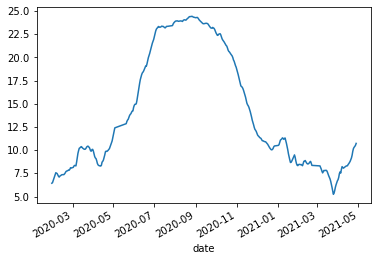

In [68]:
df.set_index('date')['average_temperature'].rolling(30).mean().plot();

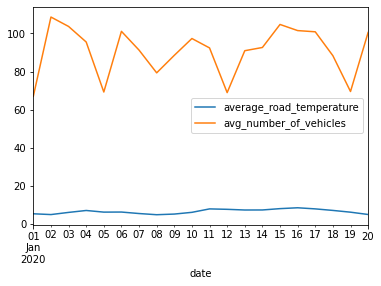

In [69]:
df.set_index('date')[:20][['average_road_temperature', 'avg_number_of_vehicles']].plot()

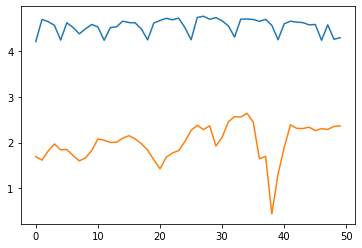

In [70]:
plt.plot(np.log(df[:50]['avg_number_of_vehicles']))
plt.plot(np.log(df[:50]['average_road_temperature']))
plt.show()

In [12]:
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek

<AxesSubplot:xlabel='dayofweek'>

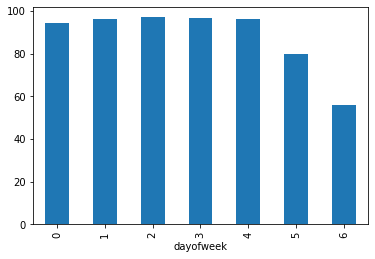

In [25]:
df.groupby('dayofweek').avg_number_of_vehicles.mean().plot(kind='bar')

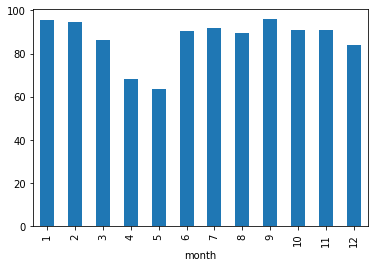

In [41]:
df.query('date < 2021').groupby('month').avg_number_of_vehicles.mean().plot(kind='bar')
plt.show()

In [22]:
df.groupby('dayofweek').avg_number_of_vehicles.mean()

dayofweek
0    94.321129
1    96.013065
2    96.955625
3    96.872698
4    96.012462
5    79.812187
6    55.762462
Name: avg_number_of_vehicles, dtype: float64